In [1]:
import fastf1
from datetime import datetime, date
from fastf1 import get_session
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## test su una sessione

In [4]:
# fastf1.Cache.enable_cache('/opt/bitnami/python/cache')

session = fastf1.get_session(2024, 1, 'R')  # 'R' per la sessione di gara (Race)

# Carica i dati della sessione
session.load(telemetry=True, laps=True, weather=False, messages=False)


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loadin

In [5]:
laps = session.laps
laps = laps.reset_index(drop=True)
ver_laps = laps[laps["Driver"] == "VER"]

In [ ]:
ver_car_data = ver_laps.get_car_data()
ver_pos_data = ver_laps.get_pos_data()

In [ ]:
ver_laps.columns, ver_car_data.columns, ver_pos_data.columns

(Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
        'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
        'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
        'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
        'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
        'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
        'FastF1Generated', 'IsAccurate'],
       dtype='object'),
 Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
        'Time', 'SessionTime'],
       dtype='object'),
 Index(['Date', 'Status', 'X', 'Y', 'Z', 'Source', 'Time', 'SessionTime'], dtype='object'))

In [ ]:
# ver_laps[["TyreLife","Time","LapNumber","LapTime","PitInTime"]]
# ver_laps[ver_laps["PitInTime"]!=np.isnat(np.datetime64("NaT"))]
idx_to_label = ver_laps[np.isnat(ver_laps["PitInTime"]) == False].index - 1
ver_laps["MakePit"] = 0
ver_laps.loc[idx_to_label,"MakePit"] = 1

C:\Users\manud\AppData\Local\Temp\ipykernel_15620\1836344406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ver_laps["MakePit"] = 0


In [ ]:
ver_laps.shape

(57, 32)

In [ ]:
session.load(telemetry=False, laps=False, weather=True, messages=False)


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


In [ ]:
barhain_w = session.weather_data
w_columns = barhain_w.columns
arrays_w = np.array_split(barhain_w,len(ver_laps))
# len(arrays_w), len(arrays_w[0])
chunked_w = [np.array(chunk)[0] for chunk in arrays_w]
len(chunked_w)

c:\Users\manud\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


57

In [ ]:
w_dataset = pd.DataFrame(chunked_w, columns=w_columns)
full_df = pd.concat([ver_laps, w_dataset],axis=1, ignore_index=False)


In [ ]:
fastf1.Cache.enable_cache('test_ml_cache')

session = fastf1.get_session(2023, 1, 'R')  # 'R' per la sessione di gara (Race)
event = fastf1.get_event(2023, 1)
# print("gathering for ", i )

session.load(telemetry=True, laps=True, weather=True, messages=False)
laps = session.laps
laps = laps.reset_index(drop=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Updating cache for session_info...
INFO:fastf1.fastf1.req:Updating cache for session_info...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Cache updated!
INFO:fastf1.fastf1.req:Cache updated!
req            INFO 	Updating cache for driver_info...
INFO:fastf1.fastf1.req:Updating cache for driver_info...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Cache updated!
INFO:fastf1.fastf1.req:Cache updated!
req            INFO 	Updating cache for session_status_data...
INFO:fastf1.fastf1.req:Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Cache updated!
INFO:fastf1.fastf1.req:Cache u

In [ ]:
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.414000,...,False,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,12,1.0,None,,False,False
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,False,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,12,1.0,None,,False,True
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,False,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,None,,False,True
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,False,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,None,,False,True
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,False,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,None,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0 days 01:17:53.364000,PIA,81,0 days 00:01:41.534000,9.0,1.0,NaT,NaT,0 days 00:00:31.989000,0 days 00:00:44.548000,...,True,McLaren,0 days 01:16:11.830000,2023-03-05 15:17:13.679,1,16.0,None,,False,True
1052,0 days 01:19:34.948000,PIA,81,0 days 00:01:41.584000,10.0,1.0,NaT,NaT,0 days 00:00:31.779000,0 days 00:00:44.617000,...,True,McLaren,0 days 01:17:53.364000,2023-03-05 15:18:55.213,1,16.0,None,,False,True
1053,0 days 01:21:16.300000,PIA,81,0 days 00:01:41.352000,11.0,1.0,NaT,NaT,0 days 00:00:31.894000,0 days 00:00:44.557000,...,True,McLaren,0 days 01:19:34.948000,2023-03-05 15:20:36.797,1,13.0,None,,False,True
1054,0 days 01:22:57.456000,PIA,81,0 days 00:01:41.156000,12.0,1.0,NaT,NaT,0 days 00:00:32.100000,0 days 00:00:44.235000,...,True,McLaren,0 days 01:21:16.300000,2023-03-05 15:22:18.149,1,11.0,None,,False,True


In [ ]:
laps[laps["Driver"]=="VER"]

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:15.961000,VER,1,0 days 00:01:39.019000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.414000,...,False,Red Bull Racing,0 days 01:02:36.652000,2023-03-05 15:03:38.501,12,1.0,None,,False,False
1,0 days 01:05:53.935000,VER,1,0 days 00:01:37.974000,2.0,1.0,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,...,False,Red Bull Racing,0 days 01:04:15.961000,2023-03-05 15:05:17.810,12,1.0,None,,False,True
2,0 days 01:07:31.941000,VER,1,0 days 00:01:38.006000,3.0,1.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,...,False,Red Bull Racing,0 days 01:05:53.935000,2023-03-05 15:06:55.784,1,1.0,None,,False,True
3,0 days 01:09:09.917000,VER,1,0 days 00:01:37.976000,4.0,1.0,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,...,False,Red Bull Racing,0 days 01:07:31.941000,2023-03-05 15:08:33.790,1,1.0,None,,False,True
4,0 days 01:10:47.952000,VER,1,0 days 00:01:38.035000,5.0,1.0,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,...,False,Red Bull Racing,0 days 01:09:09.917000,2023-03-05 15:10:11.766,1,1.0,None,,False,True
5,0 days 01:12:25.938000,VER,1,0 days 00:01:37.986000,6.0,1.0,NaT,NaT,0 days 00:00:31.341000,0 days 00:00:42.632000,...,False,Red Bull Racing,0 days 01:10:47.952000,2023-03-05 15:11:49.801,1,1.0,None,,False,True
6,0 days 01:14:03.959000,VER,1,0 days 00:01:38.021000,7.0,1.0,NaT,NaT,0 days 00:00:31.290000,0 days 00:00:42.763000,...,False,Red Bull Racing,0 days 01:12:25.938000,2023-03-05 15:13:27.787,1,1.0,None,,False,True
7,0 days 01:15:42.113000,VER,1,0 days 00:01:38.154000,8.0,1.0,NaT,NaT,0 days 00:00:31.291000,0 days 00:00:42.833000,...,False,Red Bull Racing,0 days 01:14:03.959000,2023-03-05 15:15:05.808,1,1.0,None,,False,True
8,0 days 01:17:20.391000,VER,1,0 days 00:01:38.278000,9.0,1.0,NaT,NaT,0 days 00:00:31.336000,0 days 00:00:42.823000,...,False,Red Bull Racing,0 days 01:15:42.113000,2023-03-05 15:16:43.962,1,1.0,None,,False,True
9,0 days 01:18:58.760000,VER,1,0 days 00:01:38.369000,10.0,1.0,NaT,NaT,0 days 00:00:31.361000,0 days 00:00:42.884000,...,False,Red Bull Racing,0 days 01:17:20.391000,2023-03-05 15:18:22.240,1,1.0,None,,False,True


In [ ]:
w=session.weather_data

In [ ]:
w

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:45.438000,29.8,19.0,1016.5,False,35.1,176,1.2
1,0 days 00:01:45.453000,29.7,19.0,1016.5,False,35.0,182,1.2
2,0 days 00:02:45.452000,29.7,19.0,1016.5,False,34.9,156,1.1
3,0 days 00:03:45.466000,29.6,19.0,1016.5,False,34.9,201,0.8
4,0 days 00:04:45.449000,29.6,19.0,1016.5,False,34.8,219,0.8
...,...,...,...,...,...,...,...,...
156,0 days 02:36:46.050000,26.3,21.0,1017.4,False,28.7,242,0.6
157,0 days 02:37:46.064000,26.3,21.0,1017.4,False,28.7,64,0.0
158,0 days 02:38:46.063000,26.3,21.0,1017.5,False,28.7,0,0.4
159,0 days 02:39:46.109000,26.3,21.0,1017.4,False,28.7,352,0.5


In [ ]:
## Aggregare weather data alla gara di ogni pilota
### time in weather data =  session-relative time at which the weather data was recorded. Usually recorded in timedelta
# For example, 00:10:35.123 means 10 minutes, 35 seconds, and 123 milliseconds after the start of the session.
### time nella tabella laps indica il tempo dall'inizio della sessione (non della gara) al completamento del giro.

In [ ]:
## quindi la  gara inzia dopo un'ora dall'inizio della sessione
ver_laps =laps[laps["Driver"]=="VER"]
# (ver_laps["Time"][0]),
w_race = w[w["Time"] >= ver_laps["Time"][0]]

In [ ]:
print(w_race.iloc[0,0], ver_laps.iloc[0,0])
print("fine sessione: ", w_race.iloc[len(w_race)-1,0], "fine ultimo giro verstappen: ", ver_laps.iloc[len(ver_laps)-1,0])
print(len(w_race), len(ver_laps))

0 days 01:04:45.759000 0 days 01:04:15.961000
fine sessione:  0 days 02:40:46.061000 fine ultimo giro verstappen:  0 days 02:36:33.678000
97 57


In [ ]:
## chunking : si associa al giro il dato più vicino del weather
weather_data_to_concat = []
for i in range(len(ver_laps)):
  weather_to_concat = w[w["Time"] < ver_laps["Time"][i]]
  weather_to_concat.columns= [f"weather_{colname}" for colname in weather_to_concat.columns]
  weather_to_concat = weather_to_concat.iloc[len(weather_to_concat)-1,:]
  weather_data_to_concat.append(dict(weather_to_concat))

In [ ]:
ver_data_with_weather  = pd.concat([ver_laps,pd.DataFrame(weather_data_to_concat)],axis=1)

In [ ]:
w_columns = w.columns
arrays_w = np.array_split(_w,len(laps))
# len(arrays_w), len(arrays_w[0])
chunked_w = [np.array(chunk)[0] for chunk in arrays_w]
w_dataset = pd.DataFrame(chunked_w, columns=w_columns)

full_df = pd.concat([laps, w_dataset],axis=1, ignore_index=False)

## Gathering dei dati per tutti i piloti per la stagione 2023

In [24]:
drivers = ["VER","LEC","SAI","PER","HAM","RUS","STR","ALO","PIA","NOR","BOT","ZHO","GAS","OCO","ALB","SAR","TSU"]

for i in range(1,23):
    fastf1.Cache.enable_cache('test_ml_cache')

    session = fastf1.get_session(2023, i, 'R')  # 'R' per la sessione di gara (Race)
    event = fastf1.get_event(2023, i)
    print("gathering for ", event.EventName)
    session.load(telemetry=True, laps=True, weather=True, messages=False)

    w           =   session.weather_data
    w_columns   =   w.columns
    
    laps = session.laps
    laps = laps.reset_index(drop=True)

    try:
        full_df_session = pd.read_csv("full_df_drivers.csv")
        print("loaded data of shape: ", full_df_session.shape)
    except FileNotFoundError:
        full_df_session = pd.DataFrame()
    
    for driver in drivers:
        try:
            driver_laps = laps[laps["Driver"] == driver]
            
            print("getting data of : ", driver, "for session number: ", i)
        except:
            print(f"driver {driver} not found for session {i}")
            continue
        # _car_data = driver_laps.get_car_data()
        # _pos_data = driver_laps.get_pos_data()

        # idx_to_label = driver_laps[np.isnat(driver_laps["PitInTime"]) == False].index - 1
        # driver_laps["MakePit"] = 0
        # driver_laps.loc[idx_to_label,"MakePit"] = 1

        weather_data_to_concat = []
        # print("driver_laps = ", len(driver_laps))
        # print(driver_laps.head(4))
        for idx in range(len(driver_laps)):
            weather_to_concat = w[w["Time"] < driver_laps.iloc[idx,0]]
            weather_to_concat.columns= [f"weather_{colname}" for colname in weather_to_concat.columns]
            weather_to_concat = weather_to_concat.iloc[len(weather_to_concat)-1,:]
            weather_data_to_concat.append(dict(weather_to_concat))

        print("data shape: driver and weather: ", driver_laps.shape, len(weather_data_to_concat))
        driver_laps.reset_index(drop=True,inplace=True)

        driver_data_with_weather  = pd.concat([driver_laps,pd.DataFrame(weather_data_to_concat)],axis=1)
        print("shape after merge: ", driver_data_with_weather.shape)
        driver_data_with_weather["Circuit"] = str(event.EventName)
        full_df_session = pd.concat([full_df_session, driver_data_with_weather],axis=0,ignore_index=True)
        print("shape of full df: ", full_df_session.shape)
    

    ## update csv
    full_df_session.to_csv("full_df_drivers.csv")
        # print("obtained data: ", full_df.head(5))
        # print("full  df shape = ", full_df.shape)
        # try:
        # if i>1:
        #     print("adding data to existing csv")
        #     current_df = pd.read_csv("full_data_for_model.csv")
        #     current_df = current_df.loc[:, ~current_df.columns.str.match(r'^Unnamed')]
        #     print("current df = ", current_df.head(5))
        #     # current_df = current_df.reset_index(drop=True)
        #     # full_df = full_df.reset_index(drop=True)
        #     current_df = pd.concat([full_df, current_df],axis= 0, ignore_index=False)
        #     print("length of current data: ",len(current_df))
        # # except Exception as e :
        # else:
        #     # print("exception: ", e)
        #     print("creating csv")
        #     full_df.to_csv("full_data_for_model.csv")



core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


gathering for  Bahrain Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


getting data of :  VER for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (57, 40)
getting data of :  LEC for session number:  1
data shape: driver and weather:  (40, 31) 40
shape after merge:  (40, 39)
shape of full df:  (97, 40)
getting data of :  SAI for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (154, 40)
getting data of :  PER for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (211, 40)
getting data of :  HAM for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (268, 40)
getting data of :  RUS for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (325, 40)
getting data of :  STR for session number:  1
data shape: driver and weather:  (57, 31) 57
shape after merge

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']


loaded data of shape:  (888, 41)
getting data of :  VER for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (938, 41)
getting data of :  LEC for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (988, 41)
getting data of :  SAI for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (1038, 41)
getting data of :  PER for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (1088, 41)
getting data of :  HAM for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (1138, 41)
getting data of :  RUS for session number:  2
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (1188, 41)
getting data of :  STR for session number:  2
data shape: driver and 

core           INFO 	Loading data for Australian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Australian Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (1681, 42)
getting data of :  VER for session number:  3
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (1739, 42)
getting data of :  LEC for session number:  3
data shape: driver and weather:  (1, 31) 1
shape after merge:  (1, 39)
shape of full df:  (1740, 42)
getting data of :  SAI for session number:  3
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (1798, 42)
getting data of :  PER for session number:  3
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (1856, 42)
getting data of :  HAM for session number:  3
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (1914, 42)
getting data of :  RUS for session number:  3
data shape: driver and weather:  (18, 31) 18
shape after merge:  (18, 39)
shape of full df:  (1932, 42)
getting data of :  STR for session number:  3
data shape: driver and 

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Azerbaijan Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (2516, 43)
getting data of :  VER for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2567, 43)
getting data of :  LEC for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2618, 43)
getting data of :  SAI for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2669, 43)
getting data of :  PER for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2720, 43)
getting data of :  HAM for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2771, 43)
getting data of :  RUS for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (2822, 43)
getting data of :  STR for session number:  4
data shape: driver a

core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.8]


shape of full df:  (3265, 43)
getting data of :  SAR for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (3316, 43)
getting data of :  TSU for session number:  4
data shape: driver and weather:  (51, 31) 51
shape after merge:  (51, 39)
shape of full df:  (3367, 43)
gathering for  Miami Grand Prix


req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api          

DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

In [29]:
## dati caricati fino ad azerbaijan 
drivers = ["VER","LEC","SAI","PER","HAM","RUS","STR","ALO","PIA","NOR","BOT","ZHO","GAS","OCO","ALB","SAR","TSU"]

for i in range(5,23):
    fastf1.Cache.enable_cache('test_ml_cache')

    session = fastf1.get_session(2023, i, 'R')  # 'R' per la sessione di gara (Race)
    event = fastf1.get_event(2023, i)
    print("gathering for ", event.EventName)
    session.load(telemetry=True, laps=True, weather=True, messages=False)

    w           =   session.weather_data
    w_columns   =   w.columns
    
    laps = session.laps
    laps = laps.reset_index(drop=True)

    try:
        full_df_session = pd.read_csv("full_df_drivers_from_miami.csv")
        print("loaded data of shape: ", full_df_session.shape)
    except FileNotFoundError:
        full_df_session = pd.DataFrame()
    
    for driver in drivers:
        try:
            driver_laps = laps[laps["Driver"] == driver]
            
            print("getting data of : ", driver, "for session number: ", i)
        except:
            print(f"driver {driver} not found for session {i}")
            continue
        # _car_data = driver_laps.get_car_data()
        # _pos_data = driver_laps.get_pos_data()

        # idx_to_label = driver_laps[np.isnat(driver_laps["PitInTime"]) == False].index - 1
        # driver_laps["MakePit"] = 0
        # driver_laps.loc[idx_to_label,"MakePit"] = 1

        weather_data_to_concat = []
        # print("driver_laps = ", len(driver_laps))
        # print(driver_laps.head(4))
        for idx in range(len(driver_laps)):
            weather_to_concat = w[w["Time"] < driver_laps.iloc[idx,0]]
            weather_to_concat.columns= [f"weather_{colname}" for colname in weather_to_concat.columns]
            weather_to_concat = weather_to_concat.iloc[len(weather_to_concat)-1,:]
            weather_data_to_concat.append(dict(weather_to_concat))

        print("data shape: driver and weather: ", driver_laps.shape, len(weather_data_to_concat))
        driver_laps.reset_index(drop=True,inplace=True)

        driver_data_with_weather  = pd.concat([driver_laps,pd.DataFrame(weather_data_to_concat)],axis=1)
        print("shape after merge: ", driver_data_with_weather.shape)
        driver_data_with_weather["Circuit"] = str(event.EventName)
        full_df_session = pd.concat([full_df_session, driver_data_with_weather],axis=0,ignore_index=True)
        print("shape of full df: ", full_df_session.shape)
    

    ## update csv
    full_df_session.to_csv("full_df_drivers_from_miami.csv")
        # print("obtained data: ", full_df.head(5))
        # print("full  df shape = ", full_df.shape)
        # try:
        # if i>1:
        #     print("adding data to existing csv")
        #     current_df = pd.read_csv("full_data_for_model.csv")
        #     current_df = current_df.loc[:, ~current_df.columns.str.match(r'^Unnamed')]
        #     print("current df = ", current_df.head(5))
        #     # current_df = current_df.reset_index(drop=True)
        #     # full_df = full_df.reset_index(drop=True)
        #     current_df = pd.concat([full_df, current_df],axis= 0, ignore_index=False)
        #     print("length of current data: ",len(current_df))
        # # except Exception as e :
        # else:
        #     # print("exception: ", e)
        #     print("creating csv")
        #     full_df.to_csv("full_data_for_model.csv")



core           INFO 	Loading data for Miami Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


gathering for  Miami Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']


getting data of :  VER for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (57, 40)
getting data of :  LEC for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (114, 40)
getting data of :  SAI for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (171, 40)
getting data of :  PER for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (228, 40)
getting data of :  HAM for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (285, 40)
getting data of :  RUS for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (342, 40)
getting data of :  STR for session number:  5
data shape: driver and weather:  (57, 31) 57
shape after merg

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Monaco Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (967, 41)
getting data of :  VER for session number:  6
data shape: driver and weather:  (78, 31) 78
shape after merge:  (78, 39)
shape of full df:  (1045, 41)
getting data of :  LEC for session number:  6
data shape: driver and weather:  (78, 31) 78
shape after merge:  (78, 39)
shape of full df:  (1123, 41)
getting data of :  SAI for session number:  6
data shape: driver and weather:  (78, 31) 78
shape after merge:  (78, 39)
shape of full df:  (1201, 41)
getting data of :  PER for session number:  6
data shape: driver and weather:  (76, 31) 76
shape after merge:  (76, 39)
shape of full df:  (1277, 41)
getting data of :  HAM for session number:  6
data shape: driver and weather:  (78, 31) 78
shape after merge:  (78, 39)
shape of full df:  (1355, 41)
getting data of :  RUS for session number:  6
data shape: driver and weather:  (78, 31) 78
shape after merge:  (78, 39)
shape of full df:  (1433, 41)
getting data of :  STR for session number:  6
data shape: driver an

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Spanish Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (2258, 42)
getting data of :  VER for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2324, 42)
getting data of :  LEC for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2390, 42)
getting data of :  SAI for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2456, 42)
getting data of :  PER for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2522, 42)
getting data of :  HAM for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2588, 42)
getting data of :  RUS for session number:  7
data shape: driver and weather:  (66, 31) 66
shape after merge:  (66, 39)
shape of full df:  (2654, 42)
getting data of :  STR for session number:  7
data shape: driver a

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Canadian Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (3375, 43)
getting data of :  VER for session number:  8
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (3445, 43)
getting data of :  LEC for session number:  8
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (3515, 43)
getting data of :  SAI for session number:  8
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (3585, 43)
getting data of :  PER for session number:  8
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (3655, 43)
getting data of :  HAM for session number:  8
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (3725, 43)
getting data of :  RUS for session number:  8
data shape: driver and weather:  (54, 31) 54
shape after merge:  (54, 39)
shape of full df:  (3779, 43)
getting data of :  STR for session number:  8
data shape: driver a

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Austrian Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 20: Encountered 1 timing

loaded data of shape:  (4485, 44)
getting data of :  VER for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4556, 44)
getting data of :  LEC for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4627, 44)
getting data of :  SAI for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4698, 44)
getting data of :  PER for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4769, 44)
getting data of :  HAM for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4840, 44)
getting data of :  RUS for session number:  9
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (4911, 44)
getting data of :  STR for session number:  9
data shape: driver a

core           INFO 	Loading data for British Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  British Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (5686, 45)
getting data of :  VER for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5738, 45)
getting data of :  LEC for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5790, 45)
getting data of :  SAI for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5842, 45)
getting data of :  PER for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5894, 45)
getting data of :  HAM for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5946, 45)
getting data of :  RUS for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (5998, 45)
getting data of :  STR for session number:  10
data shape: d

core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.3.8]


data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (6469, 45)
getting data of :  TSU for session number:  10
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (6521, 45)
gathering for  Hungarian Grand Prix


req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api          

loaded data of shape:  (6521, 46)
getting data of :  VER for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6591, 46)
getting data of :  LEC for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6661, 46)
getting data of :  SAI for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6731, 46)
getting data of :  PER for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6801, 46)
getting data of :  HAM for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6871, 46)
getting data of :  RUS for session number:  11
data shape: driver and weather:  (70, 31) 70
shape after merge:  (70, 39)
shape of full df:  (6941, 46)
getting data of :  STR for session number:  11
data shape: d

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Belgian Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (7566, 47)
getting data of :  VER for session number:  12
data shape: driver and weather:  (44, 31) 44
shape after merge:  (44, 39)
shape of full df:  (7610, 47)
getting data of :  LEC for session number:  12
data shape: driver and weather:  (44, 31) 44
shape after merge:  (44, 39)
shape of full df:  (7654, 47)
getting data of :  SAI for session number:  12
data shape: driver and weather:  (23, 31) 23
shape after merge:  (23, 39)
shape of full df:  (7677, 47)
getting data of :  PER for session number:  12
data shape: driver and weather:  (44, 31) 44
shape after merge:  (44, 39)
shape of full df:  (7721, 47)
getting data of :  HAM for session number:  12
data shape: driver and weather:  (44, 31) 44
shape after merge:  (44, 39)
shape of full df:  (7765, 47)
getting data of :  RUS for session number:  12
data shape: driver and weather:  (44, 31) 44
shape after merge:  (44, 39)
shape of full df:  (7809, 47)
getting data of :  STR for session number:  12
data shape: d

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Dutch Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (8250, 48)
getting data of :  VER for session number:  13
data shape: driver and weather:  (72, 31) 72
shape after merge:  (72, 39)
shape of full df:  (8322, 48)
getting data of :  LEC for session number:  13
data shape: driver and weather:  (41, 31) 41
shape after merge:  (41, 39)
shape of full df:  (8363, 48)
getting data of :  SAI for session number:  13
data shape: driver and weather:  (72, 31) 72
shape after merge:  (72, 39)
shape of full df:  (8435, 48)
getting data of :  PER for session number:  13
data shape: driver and weather:  (72, 31) 72
shape after merge:  (72, 39)
shape of full df:  (8507, 48)
getting data of :  HAM for session number:  13
data shape: driver and weather:  (72, 31) 72
shape after merge:  (72, 39)
shape of full df:  (8579, 48)
getting data of :  RUS for session number:  13
data shape: driver and weather:  (72, 31) 72
shape after merge:  (72, 39)
shape of full df:  (8651, 48)
getting data of :  STR for session number:  13
data shape: d

core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Italian Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (9377, 49)
getting data of :  VER for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9429, 49)
getting data of :  LEC for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9481, 49)
getting data of :  SAI for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9533, 49)
getting data of :  PER for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9585, 49)
getting data of :  HAM for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9637, 49)
getting data of :  RUS for session number:  14
data shape: driver and weather:  (52, 31) 52
shape after merge:  (52, 39)
shape of full df:  (9689, 49)
getting data of :  STR for session number:  14
data shape: d

core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Singapore Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (10191, 50)
getting data of :  VER for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10253, 50)
getting data of :  LEC for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10315, 50)
getting data of :  SAI for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10377, 50)
getting data of :  PER for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10439, 50)
getting data of :  HAM for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10501, 50)
getting data of :  RUS for session number:  15
data shape: driver and weather:  (62, 31) 62
shape after merge:  (62, 39)
shape of full df:  (10563, 50)
getting data of :  STR for session number:  15
data s

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Japanese Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (11093, 51)
getting data of :  VER for session number:  16
data shape: driver and weather:  (53, 31) 53
shape after merge:  (53, 39)
shape of full df:  (11146, 51)
getting data of :  LEC for session number:  16
data shape: driver and weather:  (53, 31) 53
shape after merge:  (53, 39)
shape of full df:  (11199, 51)
getting data of :  SAI for session number:  16
data shape: driver and weather:  (53, 31) 53
shape after merge:  (53, 39)
shape of full df:  (11252, 51)
getting data of :  PER for session number:  16
data shape: driver and weather:  (15, 31) 15
shape after merge:  (15, 39)
shape of full df:  (11267, 51)
getting data of :  HAM for session number:  16
data shape: driver and weather:  (53, 31) 53
shape after merge:  (53, 39)
shape of full df:  (11320, 51)
getting data of :  RUS for session number:  16
data shape: driver and weather:  (53, 31) 53
shape after merge:  (53, 39)
shape of full df:  (11373, 51)
getting data of :  STR for session number:  16
data s

core           INFO 	Loading data for Qatar Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Qatar Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (11817, 52)
getting data of :  VER for session number:  17
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (11874, 52)
getting data of :  LEC for session number:  17
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (11931, 52)
getting data of :  SAI for session number:  17
data shape: driver and weather:  (0, 31) 0
shape after merge:  (0, 31)
shape of full df:  (11931, 52)
getting data of :  PER for session number:  17
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (11988, 52)
getting data of :  HAM for session number:  17
data shape: driver and weather:  (1, 31) 1
shape after merge:  (1, 39)
shape of full df:  (11989, 52)
getting data of :  RUS for session number:  17
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (12046, 52)
getting data of :  STR for session number:  17
data shape: 

core           INFO 	Loading data for United States Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  United States Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (12655, 53)
getting data of :  VER for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12711, 53)
getting data of :  LEC for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12767, 53)
getting data of :  SAI for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12823, 53)
getting data of :  PER for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12879, 53)
getting data of :  HAM for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12935, 53)
getting data of :  RUS for session number:  18
data shape: driver and weather:  (56, 31) 56
shape after merge:  (56, 39)
shape of full df:  (12991, 53)
getting data of :  STR for session number:  18
data s

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Mexico City Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Skipping lap alignment (no suit

loaded data of shape:  (13503, 54)
getting data of :  VER for session number:  19
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (13574, 54)
getting data of :  LEC for session number:  19
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (13645, 54)
getting data of :  SAI for session number:  19
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (13716, 54)
getting data of :  PER for session number:  19
data shape: driver and weather:  (1, 31) 1
shape after merge:  (1, 39)
shape of full df:  (13717, 54)
getting data of :  HAM for session number:  19
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (13788, 54)
getting data of :  RUS for session number:  19
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (13859, 54)
getting data of :  STR for session number:  19
data shap

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  São Paulo Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (14611, 55)
getting data of :  VER for session number:  20
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (14682, 55)
getting data of :  LEC for session number:  20
data shape: driver and weather:  (1, 31) 1
shape after merge:  (1, 39)
shape of full df:  (14683, 55)
getting data of :  SAI for session number:  20
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (14754, 55)
getting data of :  PER for session number:  20
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (14825, 55)
getting data of :  HAM for session number:  20
data shape: driver and weather:  (71, 31) 71
shape after merge:  (71, 39)
shape of full df:  (14896, 55)
getting data of :  RUS for session number:  20
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (14953, 55)
getting data of :  STR for session number:  20
data shap

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Las Vegas Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Skipping lap alignment (no suit

loaded data of shape:  (15579, 56)
getting data of :  VER for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15629, 56)
getting data of :  LEC for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15679, 56)
getting data of :  SAI for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15729, 56)
getting data of :  PER for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15779, 56)
getting data of :  HAM for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15829, 56)
getting data of :  RUS for session number:  21
data shape: driver and weather:  (50, 31) 50
shape after merge:  (50, 39)
shape of full df:  (15879, 56)
getting data of :  STR for session number:  21
data s

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.8]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


gathering for  Abu Dhabi Grand Prix


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

loaded data of shape:  (16379, 57)
getting data of :  VER for session number:  22
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (16437, 57)
getting data of :  LEC for session number:  22
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (16495, 57)
getting data of :  SAI for session number:  22
data shape: driver and weather:  (57, 31) 57
shape after merge:  (57, 39)
shape of full df:  (16552, 57)
getting data of :  PER for session number:  22
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (16610, 57)
getting data of :  HAM for session number:  22
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (16668, 57)
getting data of :  RUS for session number:  22
data shape: driver and weather:  (58, 31) 58
shape after merge:  (58, 39)
shape of full df:  (16726, 57)
getting data of :  STR for session number:  22
data s

In [27]:
full_driver_laps = pd.read_csv("full_df_drivers.csv")
pd.unique(full_driver_laps.Circuit)

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Azerbaijan Grand Prix'], dtype=object)

In [30]:
full_driver_from_miami = pd.read_csv("full_df_drivers_from_miami.csv")
pd.unique(full_driver_from_miami.Circuit)

C:\Users\manud\AppData\Local\Temp\ipykernel_14184\1455603898.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  full_driver_from_miami = pd.read_csv("full_df_drivers_from_miami.csv")


array(['Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix',
       'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix',
       'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Qatar Grand Prix',
       'United States Grand Prix', 'Mexico City Grand Prix',
       'São Paulo Grand Prix', 'Las Vegas Grand Prix',
       'Abu Dhabi Grand Prix'], dtype=object)

### caricamento dati estratti e aggregazione

In [5]:
full_driver_laps = pd.read_csv("full_df_drivers.csv")
full_driver_laps.shape,pd.unique(full_driver_laps.Circuit)


((3367, 44),
 array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
        'Australian Grand Prix', 'Azerbaijan Grand Prix'], dtype=object))

In [6]:
full_driver_from_miami = pd.read_csv("full_df_drivers_from_miami.csv")
full_driver_from_miami.shape ,pd.unique(full_driver_from_miami.Circuit)


C:\Users\manud\AppData\Local\Temp\ipykernel_3544\992423531.py:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  full_driver_from_miami = pd.read_csv("full_df_drivers_from_miami.csv")


((17363, 58),
 array(['Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix',
        'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix',
        'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix',
        'Italian Grand Prix', 'Singapore Grand Prix',
        'Japanese Grand Prix', 'Qatar Grand Prix',
        'United States Grand Prix', 'Mexico City Grand Prix',
        'São Paulo Grand Prix', 'Las Vegas Grand Prix',
        'Abu Dhabi Grand Prix'], dtype=object))

In [7]:

full_driver_laps = pd.concat([full_driver_laps,full_driver_from_miami],axis=0,ignore_index=True)
## removing unnamed columns
full_driver_laps = full_driver_laps.loc[:, ~full_driver_laps.columns.str.match(r'^Unnamed')]


full_driver_laps["Season"] = "2023"

## saving full file
full_driver_laps.to_csv("drivers_laps_2023_season.csv")
full_driver_laps.shape

(20730, 41)

In [8]:
pd.unique(full_driver_laps.Circuit)

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Azerbaijan Grand Prix',
       'Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix',
       'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix',
       'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Qatar Grand Prix',
       'United States Grand Prix', 'Mexico City Grand Prix',
       'São Paulo Grand Prix', 'Las Vegas Grand Prix',
       'Abu Dhabi Grand Prix'], dtype=object)

In [45]:
full_driver_laps = pd.read_csv("drivers_laps_2023_season.csv")

### labelling

In [46]:


print("percentage of class 1: ", full_driver_laps["PitInTime"].notna().sum() / len(full_driver_laps))

print(2/50 )## 2 pit stop per ogni gara in media


percentage of class 1:  0.03859141341051616
0.04


In [47]:

idx_to_label = full_driver_laps.loc[full_driver_laps["PitInTime"].notna()].index -1
full_driver_laps["MakePit"] = 0
full_driver_laps.loc[idx_to_label,"MakePit"] = 1



### normalizzazione dei tempi sul giro e settore per ogni circuito.

In [48]:
all_circuits = pd.unique(full_driver_laps["Circuit"])
all_circuits

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Azerbaijan Grand Prix',
       'Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix',
       'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix',
       'Italian Grand Prix', 'Singapore Grand Prix',
       'Japanese Grand Prix', 'Qatar Grand Prix',
       'United States Grand Prix', 'Mexico City Grand Prix',
       'São Paulo Grand Prix', 'Las Vegas Grand Prix',
       'Abu Dhabi Grand Prix'], dtype=object)

In [49]:
abu_laps =full_driver_laps[full_driver_laps["Circuit"] == "Abu Dhabi Grand Prix"]
## converting into milliseconds
# pd.to_timedelta(abu_laps["Sector3Time"]).dt.total_seconds()

# ## sector1time della partenza è nan, si puo sostituire con 0
abu_laps["LapTime"] = pd.to_timedelta(abu_laps["LapTime"]).dt.total_seconds()
abu_laps["Sector1Time"] = pd.to_timedelta(abu_laps["Sector1Time"]).dt.total_seconds()
abu_laps["Sector2Time"] = pd.to_timedelta(abu_laps["Sector2Time"]).dt.total_seconds()
abu_laps["Sector3Time"] = pd.to_timedelta(abu_laps["Sector3Time"]).dt.total_seconds()

abu_laps.loc[np.isnan(abu_laps["Sector1Time"]), "Sector1Time"] = 0 

import joblib
# abu_laps.columns
from sklearn.preprocessing import MinMaxScaler
## circuit specific normalization tra 0 e 1 per tempi su giro e tempi settore.
all_circuits = pd.unique(full_driver_laps["Circuit"])
circuit_scalers = {}
full_data_for_training = pd.DataFrame({})
columns_for_training = ['Driver','LapNumber', 'Stint','SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason','weather_Time', 'weather_AirTemp',
       'weather_Humidity', 'weather_Pressure', 'weather_Rainfall','weather_TrackTemp', 'weather_WindDirection', 'weather_WindSpeed',
       'Circuit', 'LapTime_scaled','Sector1Time_scaled','Sector2Time_scaled','Sector3Time_scaled', 'MakePit']

for circuit in all_circuits:
    circuit_laps = full_driver_laps[full_driver_laps["Circuit"] == circuit]
    circuit_laps["LapTime"] = pd.to_timedelta(circuit_laps["LapTime"]).dt.total_seconds()
    circuit_laps["Sector1Time"] = pd.to_timedelta(circuit_laps["Sector1Time"]).dt.total_seconds()
    circuit_laps["Sector2Time"] = pd.to_timedelta(circuit_laps["Sector2Time"]).dt.total_seconds()
    circuit_laps["Sector3Time"] = pd.to_timedelta(circuit_laps["Sector3Time"]).dt.total_seconds()
    circuit_laps.loc[np.isnan(circuit_laps["Sector1Time"]), "Sector1Time"] = 0 

    ## uso min max scaling 
    scaler = MinMaxScaler()
    circuit_scalers[f"{circuit}_LapTime"] = scaler.fit(circuit_laps["LapTime"].values.reshape(-1, 1))
    circuit_laps["LapTime_scaled"] = scaler.transform(circuit_laps["LapTime"].values.reshape(-1, 1))
    
    scaler = MinMaxScaler()
    circuit_scalers[f"{circuit}_Sector1Time"] = scaler.fit(circuit_laps["Sector1Time"].values.reshape(-1, 1))
    circuit_laps["Sector1Time_scaled"] = scaler.transform(circuit_laps["Sector1Time"].values.reshape(-1, 1))
    scaler = MinMaxScaler()
    circuit_scalers[f"{circuit}_Sector2Time"] = scaler.fit(circuit_laps["Sector2Time"].values.reshape(-1, 1))
    circuit_laps["Sector2Time_scaled"] = scaler.transform(circuit_laps["Sector2Time"].values.reshape(-1, 1))
    scaler = MinMaxScaler()
    circuit_scalers[f"{circuit}_Sector3Time"] = scaler.fit(circuit_laps["Sector3Time"].values.reshape(-1, 1))
    circuit_laps["Sector3Time_scaled"] = scaler.transform(circuit_laps["Sector3Time"].values.reshape(-1, 1))
    circuit_laps = circuit_laps[columns_for_training]  
    full_data_for_training = pd.concat([full_data_for_training,circuit_laps], axis=0, ignore_index=True)  
    
    

C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1903690036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abu_laps["LapTime"] = pd.to_timedelta(abu_laps["LapTime"]).dt.total_seconds()
C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1903690036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abu_laps["Sector1Time"] = pd.to_timedelta(abu_laps["Sector1Time"]).dt.total_seconds()
C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1903690036.py:8: SettingWithCopyWarning: 
A value is trying to be set on

In [31]:
## saving scalers 
for name, scl in circuit_scalers.items():
    joblib.dump(scl,f"scalers/{name}.joblib")
    # print("nm: ", name, scl)

In [36]:
## test loading
loaded_scaler = joblib.load("scalers/Abu Dhabi Grand Prix_LapTime.joblib")
loaded_scaler.transform(pd.Series([98000,23333,4450000]).values.reshape(-1,1))

array([[  3736.13946655],
       [   887.01518678],
       [169798.64185141]])

### altre operazioni di preprocessing 


In [54]:
full_data_for_training.columns

Index(['Driver', 'LapNumber', 'Stint', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'Team', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'weather_Time', 'weather_AirTemp', 'weather_Humidity',
       'weather_Pressure', 'weather_Rainfall', 'weather_TrackTemp',
       'weather_WindDirection', 'weather_WindSpeed', 'Circuit',
       'LapTime_scaled', 'Sector1Time_scaled', 'Sector2Time_scaled',
       'Sector3Time_scaled', 'MakePit'],
      dtype='object')

In [50]:
X_training = full_data_for_training[columns_for_training]

In [51]:
from sklearn.preprocessing import LabelEncoder
## encoding di features categoriaali in numeriche
le = LabelEncoder()
X_training["Driver"] = le.fit_transform(full_data_for_training['Driver'])

X_training["Circuit"] = le.fit_transform(full_data_for_training['Circuit'])
X_training["Compound"] = le.fit_transform(full_data_for_training['Compound'])
X_training["Team"] = le.fit_transform(full_data_for_training['Team'])
X_training["IsPersonalBest"] = le.fit_transform(full_data_for_training['IsPersonalBest'])
X_training["weather_Rainfall"] = le.fit_transform(full_data_for_training['weather_Rainfall'])
## drop deleted and deleted reason 
X_training.drop(["Deleted", "DeletedReason"],axis=1,inplace=True)


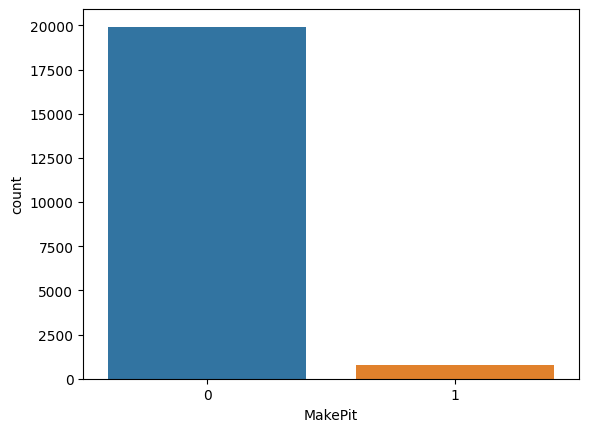

In [52]:
import seaborn as sn 
sn.countplot(data=X_training, x = "MakePit")
plt.show()

<h3> strategie per l'eccessivo unbalancing delle classi: </h3>
<br> <ul><li> grouping di osservazioni: in questo caso si potrebbero raggruppare 3 giri per volta e si prevederebbe la prob. di effettuare un pit nei prossimi 3 giri</li>
<li> usare un modello tree-based con pesi nelle classi <li> provare algo. di anomaly detection come isolation forest</ul>

In [53]:
## random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
train_data = X_training[~X_training["Circuit"].isin([15, 14, 13, 12])]
train_y = train_data["MakePit"]
train_data.drop(["MakePit"], axis=1, inplace=True)
test_data = X_training[X_training["Circuit"].isin([15, 14, 13, 12])]
test_y = test_data["MakePit"]
test_data.drop(["MakePit"], axis=1, inplace=True)

C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1601751857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["MakePit"], axis=1, inplace=True)
C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1601751857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(["MakePit"], axis=1, inplace=True)


In [59]:
train_data.drop(["weather_Time"],axis=1,inplace=True)

C:\Users\manud\AppData\Local\Temp\ipykernel_16048\1884602905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["weather_Time"],axis=1,inplace=True)


In [63]:
full_data_for_training.isna().sum()

Driver                       0
LapNumber                    0
Stint                        0
SpeedI1                   3191
SpeedI2                     38
SpeedFL                    841
SpeedST                   1815
IsPersonalBest              31
Compound                     0
TyreLife                     0
FreshTyre                    0
Team                         0
TrackStatus                  0
Position                    31
Deleted                  20730
DeletedReason            20730
weather_Time                 0
weather_AirTemp              0
weather_Humidity             0
weather_Pressure             0
weather_Rainfall             0
weather_TrackTemp            0
weather_WindDirection        0
weather_WindSpeed            0
Circuit                      0
LapTime_scaled             382
Sector1Time_scaled           0
Sector2Time_scaled          38
Sector3Time_scaled          95
MakePit                      0
dtype: int64

In [64]:
train_data.isna().sum(), train_data.shape

(Driver                      0
 LapNumber                   0
 Stint                       0
 SpeedI1                  2717
 SpeedI2                    35
 SpeedFL                   726
 SpeedST                  1641
 IsPersonalBest              0
 Compound                    0
 TyreLife                    0
 FreshTyre                   0
 Team                        0
 TrackStatus                 0
 Position                   28
 weather_AirTemp             0
 weather_Humidity            0
 weather_Pressure            0
 weather_Rainfall            0
 weather_TrackTemp           0
 weather_WindDirection       0
 weather_WindSpeed           0
 Circuit                     0
 LapTime_scaled            284
 Sector1Time_scaled          0
 Sector2Time_scaled         35
 Sector3Time_scaled         91
 dtype: int64,
 (16564, 26))

In [65]:
train_data = train_data.dropna(axis=0)
train_data.shape

(11865, 26)

In [67]:
train_y = train_y[train_data.index]

In [68]:
rf.fit(train_data, train_y)


RandomForestClassifier()

In [76]:
test_data.drop(["weather_Time"],axis=1, inplace=True)
test_data = test_data.dropna(axis=0)
preds_prob = rf.predict_proba(test_data)


C:\Users\manud\AppData\Local\Temp\ipykernel_16048\3365082343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(["weather_Time"],axis=1, inplace=True)


In [81]:
preds_prob

array([[0.8 , 0.2 ],
       [0.92, 0.08],
       [0.93, 0.07],
       ...,
       [0.72, 0.28],
       [0.71, 0.29],
       [0.71, 0.29]])

In [124]:
thres = 0.60
test_y = test_y[test_data.index]
binary_preds = [1 if i[0] < thres else 0 for i in preds_prob]
from sklearn.metrics import classification_report
print(classification_report(test_y, binary_preds))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3271
           1       0.24      0.18      0.21        87

    accuracy                           0.96      3358
   macro avg       0.61      0.58      0.60      3358
weighted avg       0.96      0.96      0.96      3358



In [125]:
np.sum(binary_preds), np.sum(test_y)

(66, 87)

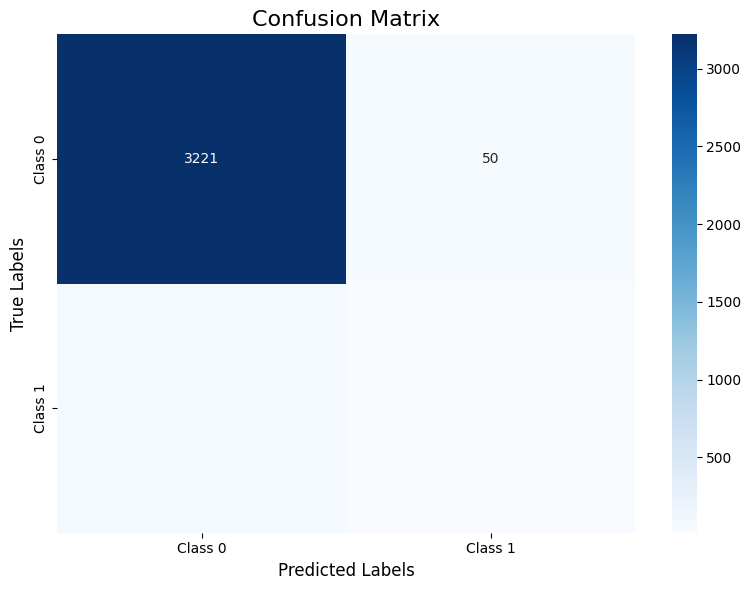

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, binary_preds)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sn.heatmap(
    cm, 
    annot=True,             # Show numbers in cells
    fmt="d",                # Format for numbers
    cmap="Blues",           # Color map
    xticklabels=["Class 0", "Class 1"],  # Custom x-axis labels
    yticklabels=["Class 0", "Class 1"]   # Custom y-axis labels
)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [126]:
cm

array([[3221,   50],
       [  71,   16]], dtype=int64)

In [127]:
from sklearn.ensemble import IsolationForest
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.004, random_state=42)  # Approx. 0.4% contamination
iso_forest.fit(train_data)


IsolationForest(contamination=0.004, random_state=42)

In [128]:

# Predict anomalies on the test set
y_pred_scores = iso_forest.decision_function(test_data)  # Higher score = more normal
y_pred = iso_forest.predict(test_data)  # Outputs -1 for anomaly, 1 for normal

# Convert predictions to binary format
y_pred_binary = np.where(y_pred == -1, 1, 0)  # 1 = anomaly, 0 = normal


In [131]:
y_pred_binary.sum()

9

In [137]:
train_data.to_csv("processed_data_for_training.csv")

In [138]:
import pickle 
# save
with open('test_rf_trained_on_2023.pkl','wb') as f:
    pickle.dump(rf,f)

In [147]:
import time 

for idx, row in test_data.iterrows():
    # predd = rf.predict_proba([row])
    # print(f"prediction for {idx}: ", predd)
    record = row.to_dict()
    record["probb"] = 9000
    print(record["probb"])
    time.sleep(3)


9000
9000
9000


KeyboardInterrupt: 

### previsione probabilità di pit-stop nei prossimi 3 giri

### simulazione faust

In [2]:
import faust